In [1]:
#load important library's

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#We load the inbuilt dataset iris form seaborn library

iris=sns.load_dataset("iris")

In [5]:
#Now we view the Head and Tail of the dataset.

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
#checking the deminsion of the dataset.

iris.shape

(150, 5)

In [11]:
#Viewing column name of the dataset.

iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
#View datatypes of columns in the dataset

iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [15]:
#Further information the dataset

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
#Describe the dataset as basic statistic 

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
#Checking the missing values on the dataset

iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Modeling

In [22]:
#Checking the value count for the target column ["species"]

iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [24]:
#change the species columns into 0,1 & 2.

iris["species"].replace({"setosa":0, "versicolor":1, "virginica":2}, inplace=True)

/var/folders/j8/8mrbnpqx5l36t09y5qwnbv4h0000gn/T/ipykernel_12878/3156419597.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris["species"].replace({"setosa":0, "versicolor":1, "virginica":2}, inplace=True)
/var/folders/j8/8mrbnpqx5l36t09y5qwnbv4h0000gn/T/ipykernel_12878/3156419597.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

In [26]:
iris["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [28]:
#Standardization 

from sklearn.preprocessing import StandardScaler
iris_Scaling=StandardScaler().fit(iris)
iris_Std=iris_Scaling.transform(iris)
iris_data_Std=pd.DataFrame(iris_Std, columns=iris.columns)
iris_data_Std.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


In [30]:
# Number of cluster-elbow method

from sklearn.cluster import KMeans
wss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=2410).fit(iris_data_Std)
    wss.append(kmeans.inertia_)
print(wss)

[750.0, 259.8617049650229, 162.17107855654797, 137.0390983301234, 110.10079235252104, 85.97263876740237, 75.99328087966182, 68.43875912216464, 58.32797812298294, 54.1321425291289]


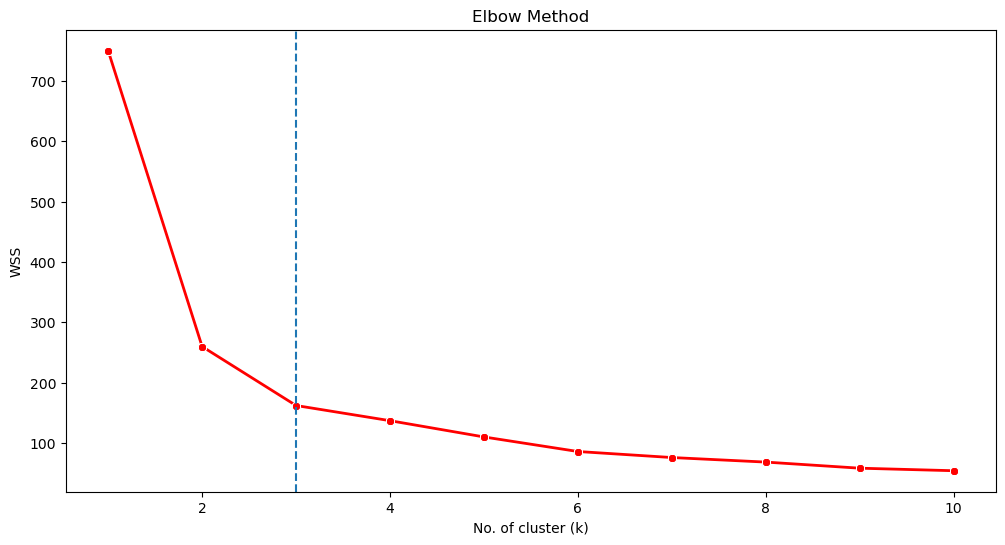

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(1,11), y=wss, linewidth=2, color="red", marker="8")
plt.axvline(x=3, ls="--")
plt.ylabel("WSS")
plt.xlabel("No. of cluster (k)")
plt.title("Elbow Method")
plt.show()

In [33]:
#Clustering with 3 clusters

KMeans_Model=KMeans(n_clusters=3, random_state=2410).fit(iris_data_Std)

In [36]:
#Cluster output binding
KMeans_Model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [38]:
#Combine cluster info to the orignal data
fulldf=pd.concat([iris,pd.Series(KMeans_Model.labels_)],axis=1).rename(columns={0:"Clusters"})
fulldf.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [40]:
#Cluster Size
fulldf["Clusters"].value_counts()

Clusters
1    54
0    50
2    46
Name: count, dtype: int64

In [42]:
#Cluster profiling
cluster_profile_df=fulldf.groupby(["Clusters"]).mean()
cluster_profile_df

,sepal_length,sepal_width,petal_length,petal_width,species
Clusters,,,,,
0,5.006000,3.428000,1.462000,0.246000,0.000000
1,5.853704,2.725926,4.325926,1.372222,1.129630
2,6.741304,3.043478,5.586957,2.032609,1.934783


In [44]:
cluster_profile_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
Clusters,,,,,
0,5.006000,3.428000,1.462000,0.246000,0.000000
1,5.853704,2.725926,4.325926,1.372222,1.129630
2,6.741304,3.043478,5.586957,2.032609,1.934783


In [46]:
fulldf.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,2,2


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

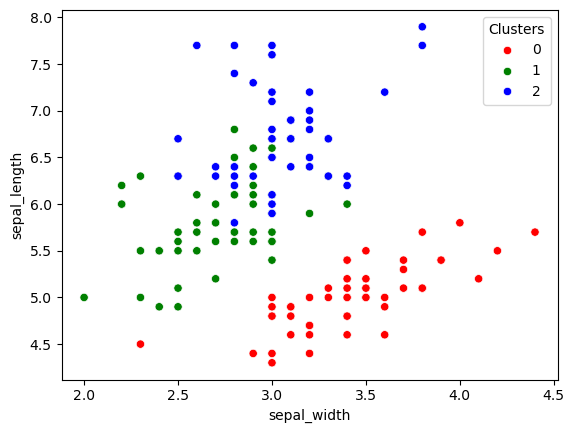

In [48]:
#Bivariate Analysis
#ploting 
sns.scatterplot(y="sepal_length", x="sepal_width", hue="Clusters",palette=["red","green","blue"], data=fulldf)

<Axes: xlabel='petal_length', ylabel='petal_width'>

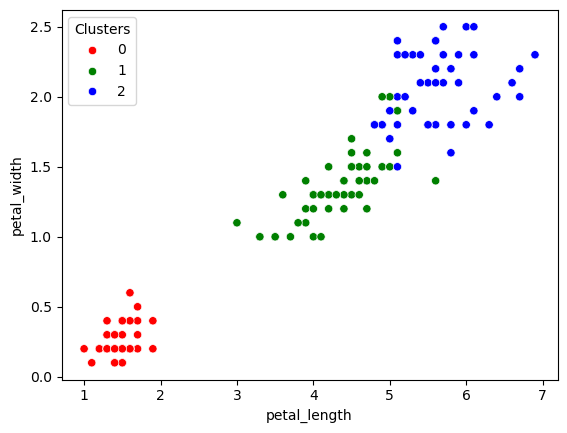

In [49]:
sns.scatterplot(x="petal_length", y="petal_width", hue="Clusters",palette=["red","green","blue"], data=fulldf)

<Axes: xlabel='petal_length', ylabel='sepal_length'>

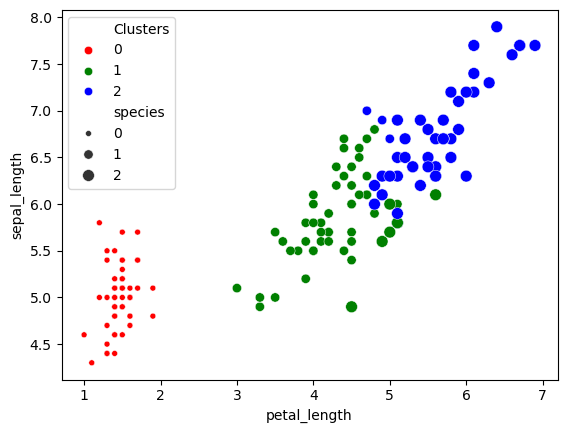

In [51]:
sns.scatterplot(y="sepal_length", x="petal_length", hue='Clusters', size="species", palette=["red", "green", "blue"], data=fulldf)

In [53]:
#Cluster validation using silhouette value
from sklearn.metrics import silhouette_samples,silhouette_score

In [56]:
#Sience we passed std data into model. So we required to use same data set into silhouette
fulldf2=pd.concat([iris_data_Std, pd.Series(KMeans_Model.labels_)], axis=1).rename(columns={0: "clusters"}).copy()
fulldf2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745,0
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745,0
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745,0
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745,0
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745,0


In [58]:
fulldf2["silhouette_value"]=silhouette_samples(fulldf2, KMeans_Model.labels_)
fulldf2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters,silhouette_value
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745,0,0.762379
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745,0,0.632012
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745,0,0.717227
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745,0,0.670687
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745,0,0.754442


In [60]:
fulldf2.groupby(["clusters"])["silhouette_value"].mean()

clusters
0    0.677134
1    0.440786
2    0.451889
Name: silhouette_value, dtype: float64

In [62]:
## Overall silhouette score range (-1 to +1)
# closer to +1 is good closter

silhouette_score(fulldf2, KMeans_Model.labels_)

0.5208018769578416

In [64]:
## Overall visualization of KMeans using PCA

from sklearn.decomposition import PCA

In [66]:
KMeans_PCA= PCA(n_components=2).fit(iris_data_Std)

In [68]:
KMeans_PCA.components_ #co efficients of information (eigen vector)
KMeans_PCA.explained_variance_ratio_ #eigen values

array([0.76740358, 0.18282727])

In [70]:
#transform the data
KMeans_PCAtransform= pd.DataFrame(KMeans_PCA.transform(iris_data_Std))

In [72]:
KMeans_PCAtransform.columns=["PCA1", "PCA2"]
KMeans_PCAtransform.head()

,PCA1,PCA2
0,-2.576120,0.474499
1,-2.415322,-0.678092
2,-2.659333,-0.348282
3,-2.601991,-0.603306
4,-2.683744,0.640220


In [74]:
#combine the cluster information
KMeans_PCAdata= pd.concat([KMeans_PCAtransform, fulldf2["clusters"]], axis=1)

<Axes: xlabel='PCA1', ylabel='PCA2'>

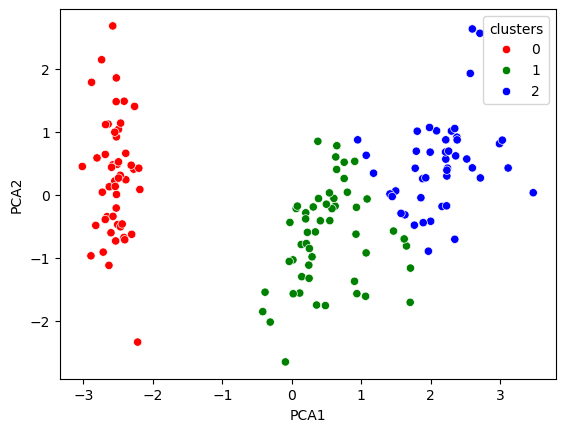

In [76]:
##plot the PCA
sns.scatterplot(x="PCA1", y="PCA2", hue="clusters", data=KMeans_PCAdata, palette=["red", "green", "blue"])